### Wordle

Dataset: [palabras de 5 letras en español](https://www.kaggle.com/datasets/vctorloureirosancho/wordle-es-spanish-5-chars-words)

[Wordle](https://wordle.danielfrg.com/) es un juego que consiste en adivinar una palabra de 5 letras en 6 intentos. En cada intento se ingresa una palabra y cada letra se puede poner de uno de los siguientes tres colores:
* verde si la letra se encuentra en la palabra a adivinar y está en la posición correcta
* amarillo si se encuentra en la palabra a adivinar pero no está en la posición correcta
* gris si la letra no se encuentra en la palabra

Utilizando el dataset de palabras de 5 letras en español busqué las 6 letras más comunes en cada posición y realicé un plot mostrándolas de más a menos común de arriba a abajo, basándome en el tablero y los colores del Wordle.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
with open('/content/drive/MyDrive/Datos/TP1/Parte 2/palabras_wordle.txt') as f:
    palabras = [line.rstrip('\n') for line in f]

In [ ]:
letras = { '1': [], '2': [], '3': [], '4': [], '5': [] }

for palabra in palabras:
  if len(palabra) != 5:
    continue
  letras['1'].append(palabra[0])
  letras['2'].append(palabra[1])
  letras['3'].append(palabra[2])
  letras['4'].append(palabra[3])
  letras['5'].append(palabra[4])

df = pd.DataFrame(letras)
df

,1,2,3,4,5
0,a,b,a,b,a
1,a,b,a,c,a
2,a,b,a,c,o
3,a,b,a,d,a
4,a,b,a,d,i
...,...,...,...,...,...
12026,ñ,u,r,d,o
12027,ñ,u,t,a,s
12028,ñ,u,t,o,s
12029,ñ,u,z,c,o


In [ ]:
cant_palabras = len(df)
df = df.stack().reset_index().drop('level_0', axis=1)
df.columns = ['posicion', 'letra']
df

,posicion,letra
0,1,a
1,2,b
2,3,a
3,4,b
4,5,a
...,...,...
60150,1,ñ
60151,2,u
60152,3,ñ
60153,4,o


Obtengo el % con el que aparece cada letra en cada posición:

In [ ]:
df = df.groupby(['posicion', 'letra']).agg({'letra': 'count'}) / cant_palabras * 100
df.columns = ['probabilidad']
df

probabilidad
posicion letra              
1        a         11.719724
         b          5.336215
         c         10.098911
         d          3.299809
         e          2.368880
...                      ...
5        t          0.332474
         u          0.357410
         x          0.216108
         y          0.756379
         z          0.773003

[130 rows x 1 columns]

In [ ]:
df.loc[df.groupby('posicion')['probabilidad'].nlargest(6).reset_index(0).index]

probabilidad
posicion letra              
1        a         11.719724
         c         10.098911
         p          7.946139
         t          6.957028
         m          6.591306
         r          5.859862
2        a         20.945890
         o         14.313025
         u         13.357161
         e         12.609093
         i         12.359737
         r          6.641177
3        r          9.758125
         l          7.730031
         a          7.164824
         n          7.048458
         i          7.006899
         e          6.732607
4        a         19.183775
         e         14.379520
         i          8.976810
         o          8.777325
         r          5.502452
         t          5.302967
5        a         21.984872
         s         20.513673
         o         18.111545
         e         12.492727
         n          9.533705
         r          5.344527

### Visualización:

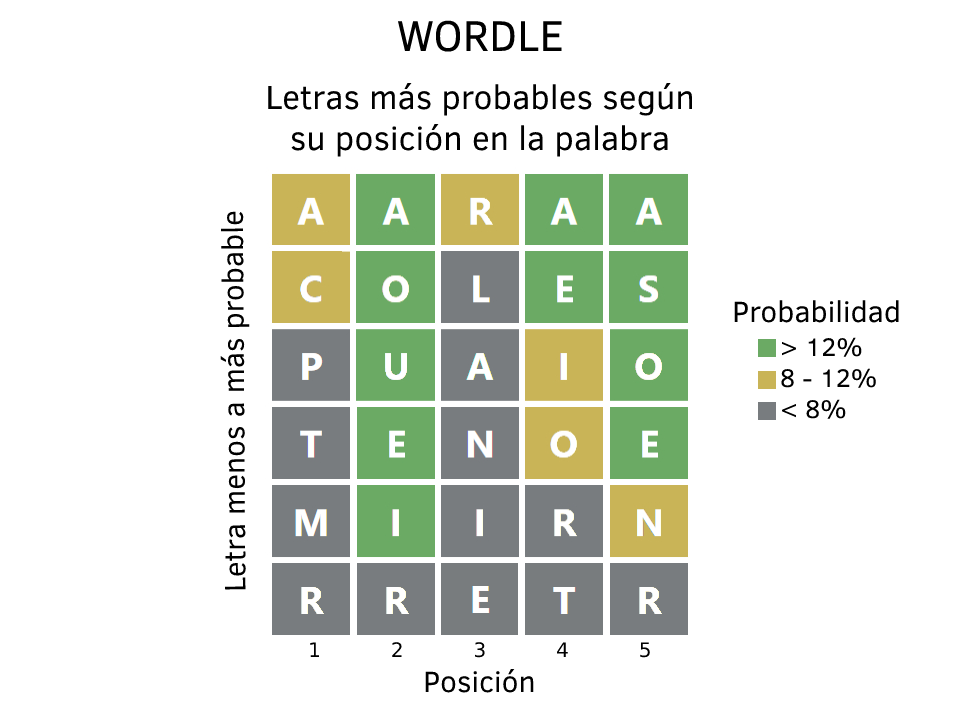